Auther: **Ubaid Ullah** <br>
Education: Bachelor In Computer Science <br>
Date: 18/Dec/2024 <br>
Email ID: ubaidsaleem811@gmail.com <br>
GitHub link: https://github.com/Ubaid883 <br>
Linkedln link: www.linkedin.com/in/ubaid-ullah-32b870264

# About Dataset


- IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
- This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets.
- We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing.
- So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

In [439]:
import pandas as pd
import numpy as np

In [440]:
# Load Dataset

temp_df = pd.read_csv('/content/IMDB Dataset.csv')


In [441]:
df = temp_df.iloc[:10000]     # we just used 10K data instead of 50K

In [442]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## We see in the above equal number of Positive , Negative Review

In [443]:
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative    4972   4960  I watched this movie when Joe Bob Briggs hoste...   
positive    5028   5023  The movie was excellent, save for some of the ...   

                
          freq  
sentiment       
negative     2  
positive     2

In [444]:
df.describe()

,review,sentiment
count,10000,10000
unique,9983,2
top,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
freq,2,5028


In [445]:
# To check Null values
df.isnull().sum()

,0
review,0
sentiment,0


In [446]:
# For duplicate
df.duplicated().sum()

17

In [447]:
# Remove Duplicated values
df = df.drop_duplicates()

In [448]:
df.duplicated().sum()

0

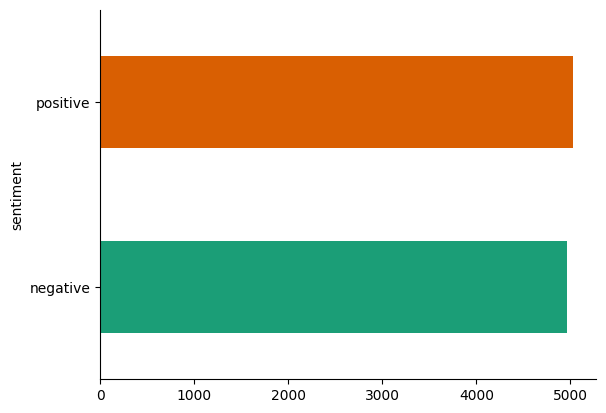

In [449]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [450]:
df['sentiment'].value_counts()

,count
sentiment,
positive,5023
negative,4960


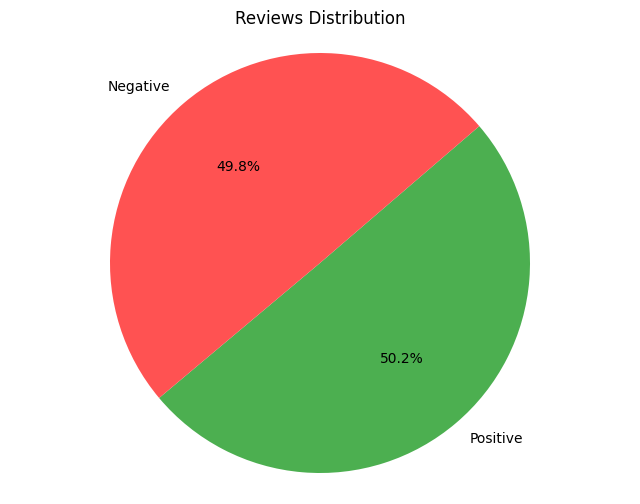

In [451]:
import matplotlib.pyplot as plt


positive_reviews = 24884  # total number of Positive Values
negative_reviews = 	24698 # Total number of Negative Values

# Prepare data for the pie chart
sizes = [positive_reviews, negative_reviews]  # Sizes of the slices
labels = ['Positive', 'Negative']  # Labels for the slices
colors = ['#4CAF50', '#FF5252']  # Colors: green for positive, red for negative
# explode = (0.1, 0)  # Explode the positive slice slightly for emphasis


# Plot the pie chart
plt.figure(figsize=(8, 6))  # Define the figure size
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=220)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle


plt.title('Reviews Distribution')  # Title of the pie chart
plt.show()  # Display the pie chart


# Text Preprocessing

In [402]:
import re

In [403]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [404]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

## Convert into Lowercase

In [405]:
df['review'] = df['review'].apply(remove_tags)

In [406]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [407]:
# Convert the review columns into Lowercase
df['review'] = df['review'].str.lower()

## Remove Stop Words

In [408]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [409]:
# Get English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    # 'text' now represents each individual review string
    words = sent_tokenize(text)  # Split the review into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stop words
    return ' '.join(filtered_words)  # Join the words back into a string

# Apply the function to the Review column
df['review'] = df['review'].apply(remove_stop_words)

df


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
9995,"fun, entertaining movie about wwii german spy ...",positive
9996,give me a break. how can anyone say that this ...,negative
9997,this movie is a bad movie. but after watching ...,negative
9998,this is a movie that was probably made to ente...,negative


# Machine Learning

In [453]:
X = df.drop(columns=['sentiment'])
y = df['sentiment']

In [454]:
y

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive
...,...
9995,positive
9996,negative
9997,negative
9998,negative


In [413]:
from sklearn.preprocessing import LabelEncoder

In [414]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [415]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 ,random_state=123)

In [416]:
X_train.shape, X_test.shape

((7986, 1), (1997, 1))

In [417]:
y_train.shape, y_test.shape

((7986,), (1997,))

In [418]:
# BoW
from sklearn.feature_extraction.text import CountVectorizer

In [419]:
count_vector = CountVectorizer()

In [420]:
X_train = count_vector.fit_transform(X_train['review']).toarray()
X_test = count_vector.transform(X_test['review']).toarray()

In [421]:
X_train.shape, X_test.shape

((7986, 48237), (1997, 48237))

In [422]:
from sklearn.naive_bayes import BernoulliNB

In [423]:
B_NB = BernoulliNB()

B_NB.fit(X_train, y_train)

BernoulliNB()

In [424]:
y_pred = B_NB.predict(X_test)

In [425]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [426]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


In [427]:
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 0.85%


In [428]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       995
           1       0.86      0.84      0.85      1002

    accuracy                           0.85      1997
   macro avg       0.85      0.85      0.85      1997
weighted avg       0.85      0.85      0.85      1997



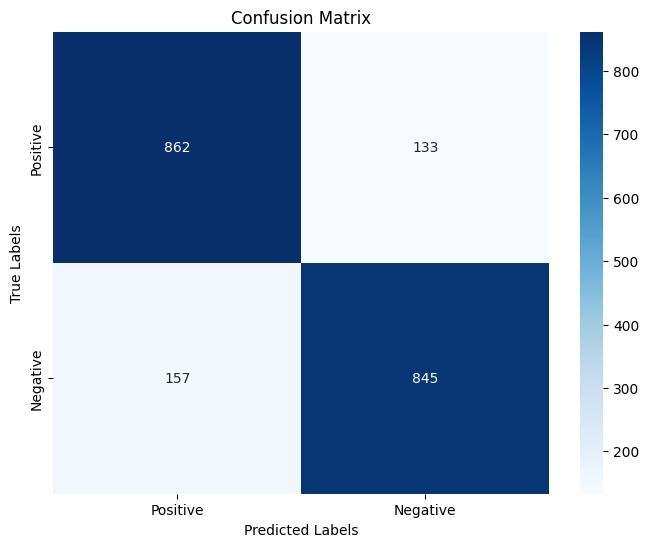

In [429]:

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive','Negative'], yticklabels=['Positive','Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## TF-IDF

In [430]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [431]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [432]:
# Fit and transform on the training data
X_train_tfidf = tfidf.fit_transform(X_train).toarray()  # Use X_train directly
X_test_tfidf = tfidf.transform(X_test).toarray()  # Use X_test directly

In [433]:
from sklearn.ensemble import RandomForestClassifier

In [434]:
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test,y_pred)




In [435]:
print(f"accuracy: {accuracy:.2f} %")

accuracy: 0.84 %


In [438]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

    negative       0.83      0.84      0.84       985
    positive       0.85      0.84      0.84      1012

    accuracy                           0.84      1997
   macro avg       0.84      0.84      0.84      1997
weighted avg       0.84      0.84      0.84      1997



In [436]:
c_m =confusion_matrix(y_test, y_pred)

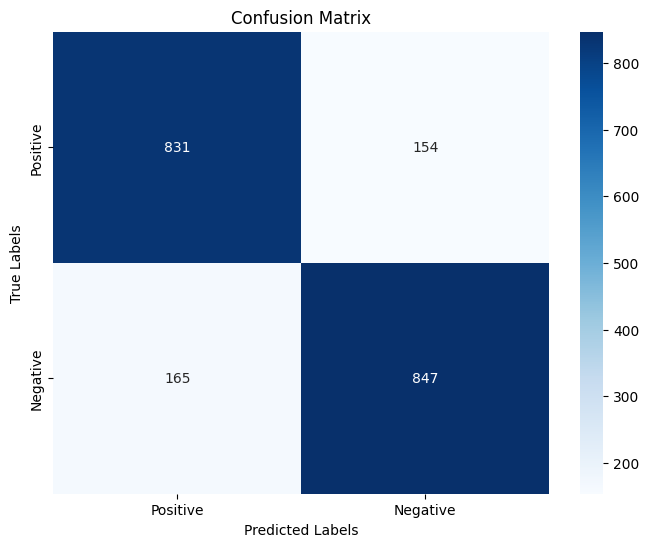

In [437]:
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive','Negative'], yticklabels=['Positive','Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()